In [1]:

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy
import pymc3 as pm


C:\Users\Fariha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd
df = pd.read_csv('Final.csv')


In [3]:
df = df.drop(columns = ['Total','Total Cases','Speedy Trial','Other Cases'])
# Rename variables in train and teste
df = df.rename(columns={'Woman & Child Repression': 'WomanChildRepression', 
                                  'Police Assault': 'PoliceAssault',
                                  'Arms Act': 'ArmsAct'})
df.head()



,Location,Dacoity,Robbery,Murder,Riot,WomanChildRepression,Kidnapping,PoliceAssault,Burglary,Theft,ArmsAct,Explosive,Narcotics,Smuggling,Year
0,DMP,47,220,245,3,1370,139,155,555,1915,518,82,10535,144,2010
1,CMP,16,108,94,7,455,37,31,123,314,51,0,866,99,2010
2,KMP,3,9,29,0,153,11,4,65,91,19,2,792,13,2010
3,RMP,4,20,21,15,157,9,12,53,106,3,4,332,248,2010
4,BMP,8,12,19,0,112,6,8,24,83,17,0,155,117,2010


In [4]:

# Select only categorical variables

#category_df = df.select_dtypes('object')

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Location']= label_encoder.fit_transform(df['Location']) 
  
df['Location'].unique()
#dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
#dummy_df['Location'] = df['Location']
#dummy_df
df.head()

,Location,Dacoity,Robbery,Murder,Riot,WomanChildRepression,Kidnapping,PoliceAssault,Burglary,Theft,ArmsAct,Explosive,Narcotics,Smuggling,Year
0,4,47,220,245,3,1370,139,155,555,1915,518,82,10535,144,2010
1,2,16,108,94,7,455,37,31,123,314,51,0,866,99,2010
2,7,3,9,29,0,153,11,4,65,91,19,2,792,13,2010
3,10,4,20,21,15,157,9,12,53,106,3,4,332,248,2010
4,0,8,12,19,0,112,6,8,24,83,17,0,155,117,2010


In [132]:
print("Robbery")
df.corr()['Robbery'].sort_values()

Robbery


Location               -0.303254
Year                   -0.154521
Smuggling               0.337393
Riot                    0.480969
Explosive               0.570811
Narcotics               0.608829
Murder                  0.705324
ArmsAct                 0.726591
Dacoity                 0.727712
WomanChildRepression    0.737043
PoliceAssault           0.754562
Kidnapping              0.926534
Burglary                0.927126
Theft                   0.943868
Robbery                 1.000000
Name: Robbery, dtype: float64

In [113]:
print("Murder")
df.corr()['Murder'].sort_values()

Murder


Location               -0.123186
Year                   -0.027213
PoliceAssault           0.670841
Robbery                 0.705324
Theft                   0.728662
Burglary                0.771330
Kidnapping              0.835184
Dacoity                 0.914363
WomanChildRepression    0.952052
Murder                  1.000000
Name: Murder, dtype: float64

In [59]:
print("Riot")
df.corr()['Riot'].sort_values()

Riot


Year                     -0.242366
Smuggling                 0.129106
Narcotics                 0.151417
arms_act                  0.284969
Murder                    0.327372
Explosive                 0.338053
woman_child_repression    0.361317
Kidnapping                0.446278
Dacoity                   0.453850
Theft                     0.468653
Robbery                   0.480969
Burglary                  0.485990
police_assault            0.573465
Riot                      1.000000
Name: Riot, dtype: float64

In [58]:
print("Woman & Child Repression")
df.corr()['woman_child_repression'].sort_values()

Woman & Child Repression


Year                     -0.041341
Riot                      0.361317
Explosive                 0.391968
Smuggling                 0.607281
Narcotics                 0.641606
police_assault            0.681441
arms_act                  0.683651
Robbery                   0.737043
Theft                     0.766508
Burglary                  0.804611
Kidnapping                0.855463
Dacoity                   0.890722
Murder                    0.952052
woman_child_repression    1.000000
Name: woman_child_repression, dtype: float64

In [70]:
print("Kidnapping")
df.corr()['Kidnapping'].sort_values()

Kidnapping


Year                   -0.147571
Smuggling               0.426669
Riot                    0.446278
Explosive               0.549282
Narcotics               0.624824
ArmsAct                 0.736810
PoliceAssault           0.757995
Murder                  0.835184
Dacoity                 0.842333
WomanChildRepression    0.855463
Theft                   0.907107
Robbery                 0.926534
Burglary                0.927530
Kidnapping              1.000000
Name: Kidnapping, dtype: float64

In [57]:
print("Police Assault")
df.corr()['police_assault'].sort_values()

Police Assault


Year                      0.015636
Smuggling                 0.168884
Riot                      0.573465
Explosive                 0.603023
Narcotics                 0.646564
Murder                    0.670841
woman_child_repression    0.681441
arms_act                  0.694054
Dacoity                   0.700679
Robbery                   0.754562
Kidnapping                0.757995
Theft                     0.776993
Burglary                  0.810028
police_assault            1.000000
Name: police_assault, dtype: float64

In [25]:
print("Burglary")
df.corr()['Burglary'].sort_values()

Burglary


Year                       -0.113884
Smuggling                   0.307858
Riot                        0.485990
Explosive                   0.576273
Narcotics                   0.672713
Arms Act                    0.706428
Murder                      0.771330
Dacoity                     0.792786
Woman & Child Repression    0.804611
Police Assault              0.810028
Robbery                     0.927126
Kidnapping                  0.927530
Theft                       0.954545
Burglary                    1.000000
Name: Burglary, dtype: float64

In [26]:
print("Theft")
df.corr()['Theft'].sort_values()

Theft


Year                       -0.128138
Smuggling                   0.353307
Riot                        0.468653
Explosive                   0.575446
Arms Act                    0.671326
Narcotics                   0.674707
Murder                      0.728662
Dacoity                     0.729012
Woman & Child Repression    0.766508
Police Assault              0.776993
Kidnapping                  0.907107
Robbery                     0.943868
Burglary                    0.954545
Theft                       1.000000
Name: Theft, dtype: float64

In [56]:
print("Arms Act")
df.corr()['arms_act'].sort_values()

Arms Act


Year                      0.147749
Riot                      0.284969
Smuggling                 0.347898
Explosive                 0.573256
Dacoity                   0.642184
Theft                     0.671326
woman_child_repression    0.683651
police_assault            0.694054
Burglary                  0.706428
Murder                    0.713149
Robbery                   0.726591
Kidnapping                0.736810
Narcotics                 0.753646
arms_act                  1.000000
Name: arms_act, dtype: float64

In [28]:
print("Explosive")
df.corr()['Explosive'].sort_values()

Explosive


Year                        0.206641
Smuggling                   0.269408
Dacoity                     0.294048
Riot                        0.338053
Murder                      0.358960
Woman & Child Repression    0.391968
Kidnapping                  0.549282
Robbery                     0.570811
Arms Act                    0.573256
Theft                       0.575446
Burglary                    0.576273
Narcotics                   0.592619
Police Assault              0.603023
Explosive                   1.000000
Name: Explosive, dtype: float64

In [29]:
print("Narcotics")
df.corr()['Narcotics'].sort_values()

Narcotics


Riot                        0.151417
Smuggling                   0.281583
Year                        0.344003
Dacoity                     0.517206
Explosive                   0.592619
Robbery                     0.608829
Kidnapping                  0.624824
Woman & Child Repression    0.641606
Police Assault              0.646564
Murder                      0.667078
Burglary                    0.672713
Theft                       0.674707
Arms Act                    0.753646
Narcotics                   1.000000
Name: Narcotics, dtype: float64

In [62]:

print("Smuggling")
df.corr()['Smuggling'].sort_values()

Smuggling


Year                     -0.052491
Riot                      0.129106
police_assault            0.168884
Explosive                 0.269408
Narcotics                 0.281583
Burglary                  0.307858
Robbery                   0.337393
arms_act                  0.347898
Theft                     0.353307
Dacoity                   0.364328
Kidnapping                0.426669
Murder                    0.524753
woman_child_repression    0.607281
Smuggling                 1.000000
Name: Smuggling, dtype: float64

In [63]:
print("Dacoity")
df.corr()['Dacoity'].sort_values()

Dacoity


Year                     -0.179960
Explosive                 0.294048
Smuggling                 0.364328
Riot                      0.453850
Narcotics                 0.517206
arms_act                  0.642184
police_assault            0.700679
Robbery                   0.727712
Theft                     0.729012
Burglary                  0.792786
Kidnapping                0.842333
woman_child_repression    0.890722
Murder                    0.914363
Dacoity                   1.000000
Name: Dacoity, dtype: float64

In [5]:
def format_data(df,string):
    # Targets are final grade of student
    labels = df[string]
    
    # Drop the school and the grades from features
    #df = df.drop(columns=['school', 'G1', 'G2', 'percentile'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    print(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()[string].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:8]
    
    df1 = df.ix[:, most_correlated.index]
    #df1["Location"] = df["Location"]
    df1["Year"] = df["Year"]
    
    
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df1, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [6]:
string = "Murder"
X_train, X_test, y_train, y_test = format_data(df,string)
X_train.head()


     Location  Dacoity  Robbery  Murder  Riot  WomanChildRepression  \
0           4       47      220     245     3                  1370   
1           2       16      108      94     7                   455   
2           7        3        9      29     0                   153   
3          10        4       20      21    15                   157   
4           0        8       12      19     0                   112   
5          15       12       33      33     1                   104   
6           5      162      199    1153     7                  4272   
7           9        0        0       0     0                     0   
8           3      153      122     639    32                  2915   
9          16       85       43     245    17                   848   
10          8       74      125     513    15                  2275   
11          1       38       37     207     3                   991   
12         13       54      130     757    29                  4095   
13    

[153 rows x 15 columns]


C:\Users\Fariha\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Murder,WomanChildRepression,Dacoity,Kidnapping,Burglary,Theft,ArmsAct,Robbery,Year
128,303,861,31,19,103,399,49,31,2017
27,414,2796,58,119,395,902,152,124,2011
64,345,2389,18,54,142,533,27,62,2013
142,854,3014,71,82,304,931,292,96,2018
127,626,1889,64,77,360,786,581,74,2017


C:\Users\Fariha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Fariha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Fariha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Fariha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Fariha\Anaconda3\lib\site-packages\matplotlib\axes\_axe

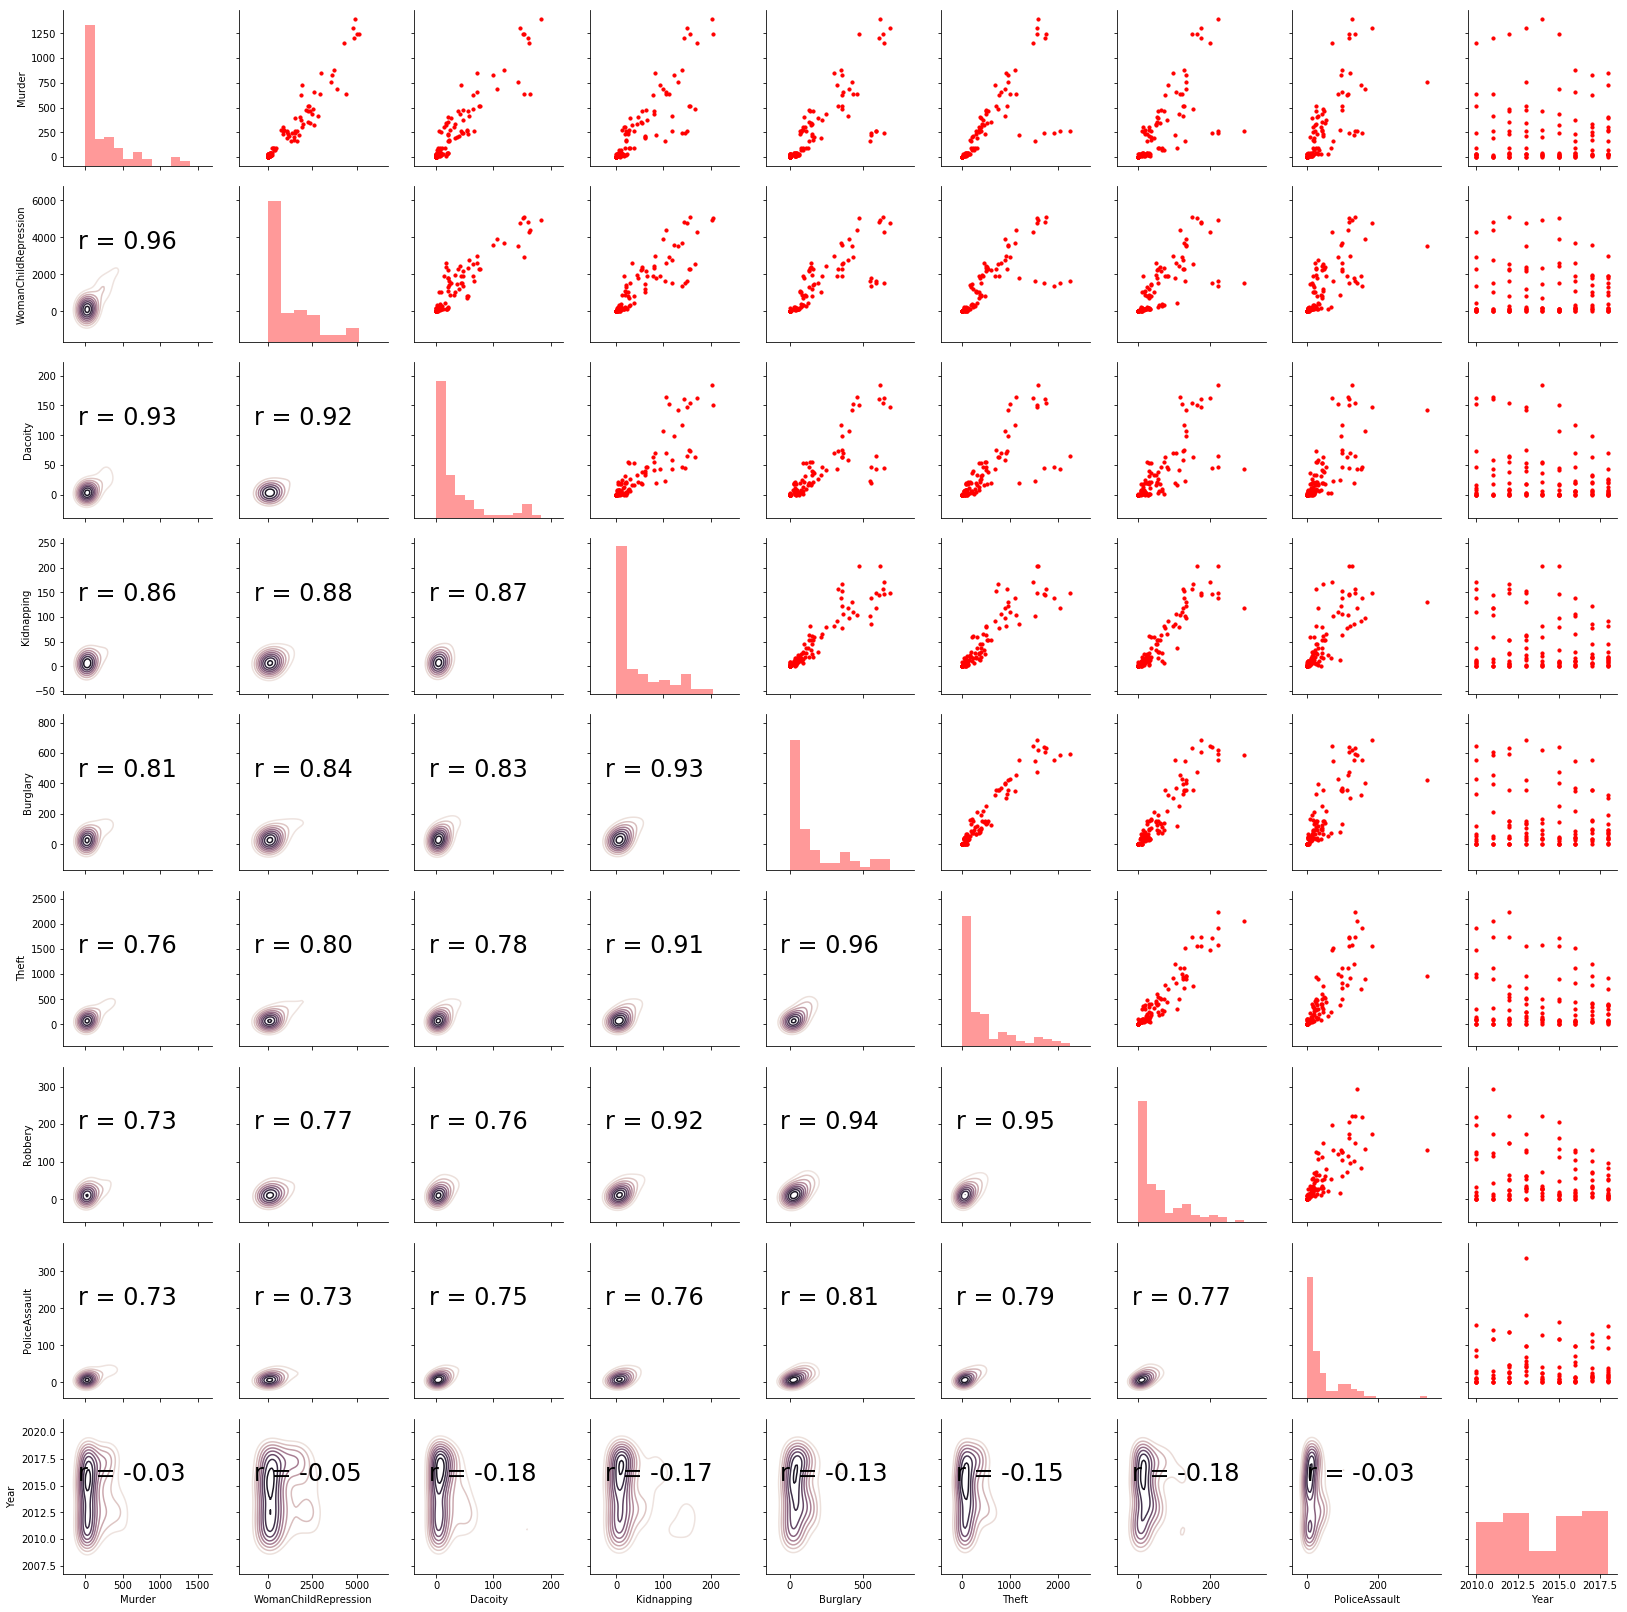

In [126]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [7]:
formula = string+" "+"~ " + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Murder ~ WomanChildRepression + Dacoity + Kidnapping + Burglary + Theft + ArmsAct + Robbery + Year'

In [8]:

# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Year, Robbery, ArmsAct, Theft, Burglary, Kidnapping, Dacoity, WomanChildRepression, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [06:16<00:00,  4.58draws/s] 
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9972401485374465, but should be close to 0.8. Try to increase the number of tuning steps.
There were 126 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9769811366746602, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.


In [9]:
import numpy as np
model_formula = string+ " ="
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Murder = 0.48 * Intercept + 0.21 * WomanChildRepression + 0.41 * Dacoity + -0.73 * Kidnapping + 0.07 * Burglary + -0.03 * Theft + 0.51 * ArmsAct + 0.22 * Robbery + -0.01 * Year + -0.90 * sd_log__ + 0.41 * sd'

In [12]:
# Make a new prediction from the test set and compare to actual value
def test_model(trace, test_observation,string):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation[string]
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop(string)
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of crime
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual crime
    plt.vlines(x = actual, ymin = 0, ymax = 5, 
               linestyles = '--', colors = 'red',
               label = 'True'+string,
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel(string); plt.ylabel('Density');
    
    # Prediction information
    print('True '+string+' = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

Test Observation:
Murder                    23
WomanChildRepression     171
Dacoity                    3
Kidnapping                12
Burglary                  57
Theft                     92
ArmsAct                   14
Robbery                   13
Year                    2011
Name: 19, dtype: int64


C:\Users\Fariha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Murder = 23
Average Estimate = 22.2004
5% Estimate = 21.5721    95% Estimate = 22.9306


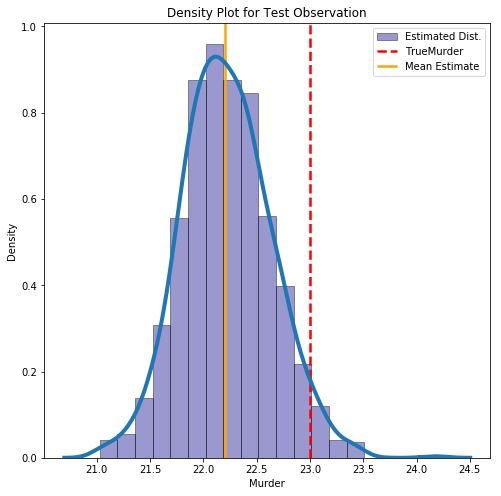

In [13]:
test_model(normal_trace, X_test.iloc[10],string)

In [11]:
model_formula
     

'Murder = 0.48 * Intercept + 0.21 * WomanChildRepression + 0.41 * Dacoity + -0.73 * Kidnapping + 0.07 * Burglary + -0.03 * Theft + 0.51 * ArmsAct + 0.22 * Robbery + -0.01 * Year + -0.90 * sd_log__ + 0.41 * sd +'

In [66]:
from pgmpy.models import BayesianModel

In [67]:
def format_data(df,string):
    # Targets are final grade of student
    labels = df[string]
    
    # Drop the school and the grades from features
    #df = df.drop(columns=['school', 'G1', 'G2', 'percentile'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    print(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()[string].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:8]
    
    df1 = df.ix[:, most_correlated.index]
    df1["Year"]=df["Year"]
    df1["Location"] = df["Location"]
    
    #df1[df1.columns[::-1]]
    df1= df1.iloc[:, ::-1]
    
    
    
    return df1



In [68]:
string = 'Dacoity'
df= format_data(df,string)
df

     Location  Dacoity  Robbery  Murder  Riot  WomanChildRepression  \
0           4       47      220     245     3                  1370   
1           2       16      108      94     7                   455   
2           7        3        9      29     0                   153   
3          10        4       20      21    15                   157   
4           0        8       12      19     0                   112   
5          15       12       33      33     1                   104   
6           5      162      199    1153     7                  4272   
7           9        0        0       0     0                     0   
8           3      153      122     639    32                  2915   
9          16       85       43     245    17                   848   
10          8       74      125     513    15                  2275   
11          1       38       37     207     3                   991   
12         13       54      130     757    29                  4095   
13    

[153 rows x 15 columns]


C:\Users\Fariha\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Location,Year,PoliceAssault,Robbery,Theft,Burglary,Kidnapping,WomanChildRepression,Murder,Dacoity
0,4,2010,155,220,1915,555,139,1370,245,47
1,2,2010,31,108,314,123,37,455,94,16
2,7,2010,4,9,91,65,11,153,29,3
3,10,2010,12,20,106,53,9,157,21,4
4,0,2010,8,12,83,24,6,112,19,8
5,15,2010,12,33,154,33,14,104,33,12
6,5,2010,71,199,1477,643,171,4272,1153,162
7,9,2010,0,0,0,0,0,0,0,0
8,3,2010,87,122,998,429,111,2915,639,153
9,16,2010,19,43,524,186,41,848,245,85


In [90]:
model = BayesianModel([('Location','Dacoity')])
model.fit(df)

In [91]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
q = infer.query(variables=["Dacoity"],evidence ={'Location':4})

In [30]:
q

{'Murder': <DiscreteFactor representing phi(Murder:103) at 0x28014b4ba58>}

In [31]:
print(q)

{'Murder': <DiscreteFactor representing phi(Murder:103) at 0x28014b4ba58>}


In [92]:
import numpy as np

result = q['Dacoity'].values
print(result)
result =  np.mean(result)
print(result)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.11111111 0.         0.
 0.11111111 0.         0.         0.11111111 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11111111 0.
 0.11111111 0.33333333 0.         0.         0.         0.
 0.         0.         0.         0.11111111 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
0.015151515151515152
